# Trabalho de algoritmo imunologico
* Arthur Severo de Souza
* Victor Le Roy Matos

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

from src.Individual import Individual

In [2]:
# Definindo variaveis globais
MAX_IT = 50
N = 50
N1 = 50
N2 = 0
BETA = 0.1
NC = BETA * N #  Define o número de clones a ser gerado para cada anticorpo
RO = 0.1 # Parâmetro da equação de mutação
MUTATION_RATE = 0.3 # Taxa de mutação

In [3]:
# Bird function
def fitnessFunction(x, y):
    result = (
        np.sin(x) * np.exp((1 - np.cos(y))**2) +
        np.cos(y) * np.exp((1 - np.sin(x))**2) +
        (x - y)**2
    )
    return round(result, 2)

In [4]:
def cloneAntibodies(P):
    C = []
    for p in P:
        for i in range(int(NC)):
            r = Individual(p.x, p.y)
            C.append(r)
    return C

In [5]:
def generateIndividuals():
    S = []
    for i in range(N):
        S.append(Individual(np.random.uniform(-10, 10), np.random.uniform(-10, 10)))
    return S

In [6]:
def clonalgOPT():

    fitness_sum_med = []
    fitness_sum_min = []
    fitness_sum_max = []

    P = generateIndividuals()
    t = 1
    while t <= MAX_IT:
        for p in P:
            p.calculateFitness(fitnessFunction)
        P.sort(key=lambda x: x.fitness, reverse=False)
        P1 = P[:N1]
        C = cloneAntibodies(P1)
        for c in C:
            c.tryToMutate(RO, MUTATION_RATE)
            c.calculateFitness(fitnessFunction)
        C.sort(key=lambda x: x.fitness, reverse=False)
        P2 = C[:N1]
        P = P2
        t = t + 1
        f_sum = 0
        for i in P:
            f_sum += i.fitness
        fitness_sum_med.append(f_sum / N)
        fitness_sum_min.append(P[len(P)-1].fitness)
        fitness_sum_max.append(P[0].fitness)


    return P, fitness_sum_med, fitness_sum_min, fitness_sum_max

Best solution:  x: -7.86983     y: -9.40844     Fitness: -106.76


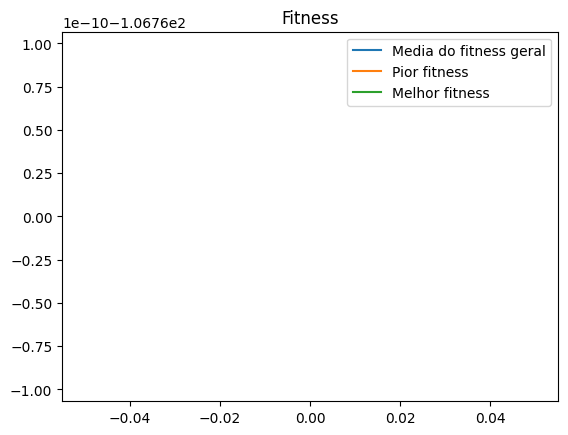

In [7]:
antibody_population, fitness_sum_med, fitness_sum_min, fitness_sum_max = clonalgOPT()

print("Best solution: ", antibody_population[0])

plt.plot(fitness_sum_med, label='Media do fitness geral')
plt.plot(fitness_sum_min, label='Pior fitness')
plt.plot(fitness_sum_max, label='Melhor fitness')
plt.title('Fitness')
plt.legend()
plt.show()